<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DSPT8_422_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
from sklearn.model_selection import train_test_split 
import numpy as np
def load_quickdraw10(path):

  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                      random_state=42)

  return X_train, X_test, y_train, y_test

In [2]:
X_train, X_test, y_train, y_test = load_quickdraw10('sample_data/quickdraw10.npz')

In [3]:
X_train.shape
y_train.shape

(70000,)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [4]:
# Imports
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

def create_model(lr=.01, optimizer=SGD):
  
  opt = optimizer(learning_rate=lr)

  model = Sequential(
      [
      Dense(32, activation='sigmoid', input_dim=784),
      Dense(32, activation='sigmoid'), 
      Dense(10, activation='softmax')
      ]
  )

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

Analysis: Higher batch size had better accuracy than lower batch size

In [5]:
batch_32 = create_model()

batch_default = batch_32.fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=32, 
                             validation_data=(X_test, y_test))

Epoch 1/15
2188/2188 [==============================] - 5s 2ms/step - loss: 2.0839 - accuracy: 0.3324 - val_loss: 1.5837 - val_accuracy: 0.5600
Epoch 2/15
2188/2188 [==============================] - 4s 2ms/step - loss: 1.4797 - accuracy: 0.5903 - val_loss: 1.2645 - val_accuracy: 0.6322
Epoch 3/15
2188/2188 [==============================] - 4s 2ms/step - loss: 1.2186 - accuracy: 0.6493 - val_loss: 1.1245 - val_accuracy: 0.6711
Epoch 4/15
2188/2188 [==============================] - 4s 2ms/step - loss: 1.0890 - accuracy: 0.6776 - val_loss: 1.0565 - val_accuracy: 0.6770
Epoch 5/15
2188/2188 [==============================] - 4s 2ms/step - loss: 1.0256 - accuracy: 0.6869 - val_loss: 0.9920 - val_accuracy: 0.6961
Epoch 6/15
2188/2188 [==============================] - 4s 2ms/step - loss: 0.9820 - accuracy: 0.6990 - val_loss: 0.9351 - val_accuracy: 0.7141
Epoch 7/15
2188/2188 [==============================] - 4s 2ms/step - loss: 0.9400 - accuracy: 0.7119 - val_loss: 0.9336 - val_accuracy:

In [6]:
batch_10 = create_model()

batch_10 = batch_10.fit(X_train, y_train,
                              epochs=15,
                              batch_size=10,
                              validation_data=(X_test, y_test))

Epoch 1/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.8587 - accuracy: 0.4272 - val_loss: 1.2618 - val_accuracy: 0.6058
Epoch 2/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.1891 - accuracy: 0.6228 - val_loss: 1.1146 - val_accuracy: 0.6437
Epoch 3/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.1137 - accuracy: 0.6413 - val_loss: 1.0761 - val_accuracy: 0.6542
Epoch 4/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.0948 - accuracy: 0.6518 - val_loss: 1.1369 - val_accuracy: 0.6274
Epoch 5/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.1340 - accuracy: 0.6333 - val_loss: 1.0745 - val_accuracy: 0.6533
Epoch 6/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.1069 - accuracy: 0.6487 - val_loss: 1.0593 - val_accuracy: 0.6563
Epoch 7/15
7000/7000 [==============================] - 11s 2ms/step - loss: 1.0678 - accuracy: 0.6546 - val_loss: 1.0928 - val_ac

In [7]:
batch_6 = create_model().fit(X_train, y_train,
                             epochs=15,
                             batch_size=6,
                             validation_data=(X_test, y_test))

Epoch 1/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.7527 - accuracy: 0.4463 - val_loss: 1.2399 - val_accuracy: 0.6158
Epoch 2/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.2403 - accuracy: 0.6045 - val_loss: 1.1974 - val_accuracy: 0.6111
Epoch 3/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.1902 - accuracy: 0.6065 - val_loss: 1.1685 - val_accuracy: 0.6018
Epoch 4/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.1580 - accuracy: 0.6139 - val_loss: 1.1038 - val_accuracy: 0.6361
Epoch 5/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.1241 - accuracy: 0.6259 - val_loss: 1.1084 - val_accuracy: 0.6275
Epoch 6/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.1466 - accuracy: 0.6190 - val_loss: 1.0955 - val_accuracy: 0.6514
Epoch 7/15
11667/11667 [==============================] - 18s 2ms/step - loss: 1.0942 - accuracy: 0.6452 - val_loss: 1

In [8]:
batch_40 = create_model().fit(X_train, y_train,
                              epochs=15,
                              batch_size=40,
                              validation_data=(X_test, y_test))

Epoch 1/15
1750/1750 [==============================] - 4s 2ms/step - loss: 2.1904 - accuracy: 0.2853 - val_loss: 1.7517 - val_accuracy: 0.5404
Epoch 2/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.6423 - accuracy: 0.5592 - val_loss: 1.3863 - val_accuracy: 0.6211
Epoch 3/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.3348 - accuracy: 0.6376 - val_loss: 1.2155 - val_accuracy: 0.6635
Epoch 4/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.1614 - accuracy: 0.6731 - val_loss: 1.0700 - val_accuracy: 0.6954
Epoch 5/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.0620 - accuracy: 0.6938 - val_loss: 1.0111 - val_accuracy: 0.6999
Epoch 6/15
1750/1750 [==============================] - 3s 2ms/step - loss: 1.0032 - accuracy: 0.7027 - val_loss: 0.9743 - val_accuracy: 0.7119
Epoch 7/15
1750/1750 [==============================] - 3s 2ms/step - loss: 0.9579 - accuracy: 0.7154 - val_loss: 0.9298 - val_accuracy:

In [9]:
batch_70 = create_model().fit(X_train, y_train,
                              epochs=15,
                              batch_size=70,
                              validation_data=(X_test, y_test))

Epoch 1/15
1000/1000 [==============================] - 2s 2ms/step - loss: 2.2254 - accuracy: 0.2432 - val_loss: 1.9174 - val_accuracy: 0.4878
Epoch 2/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8321 - accuracy: 0.5020 - val_loss: 1.6051 - val_accuracy: 0.5541
Epoch 3/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5452 - accuracy: 0.5700 - val_loss: 1.3953 - val_accuracy: 0.6177
Epoch 4/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.3550 - accuracy: 0.6279 - val_loss: 1.2517 - val_accuracy: 0.6506
Epoch 5/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.2152 - accuracy: 0.6646 - val_loss: 1.1564 - val_accuracy: 0.6690
Epoch 6/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1307 - accuracy: 0.6805 - val_loss: 1.0846 - val_accuracy: 0.6929
Epoch 7/15
1000/1000 [==============================] - 2s 2ms/step - loss: 1.0601 - accuracy: 0.6974 - val_loss: 1.0309 - val_accuracy:

In [10]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([batch_default, batch_10, batch_6, batch_40, batch_70], ["32_", "10_", "6_", "40_", "70_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.899525,0.436314,1.583716,0.560000,0,32_
1,1.402038,0.604386,1.264455,0.632233,1,32_
2,1.181183,0.658286,1.124513,0.671100,2,32_
3,1.067669,0.682729,1.056548,0.676967,3,32_
4,1.006359,0.693314,0.992036,0.696133,4,32_


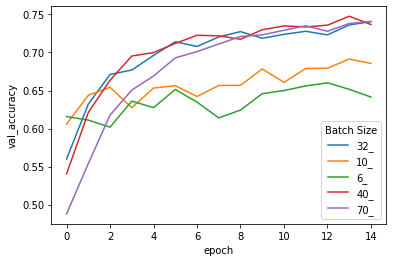

In [11]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)

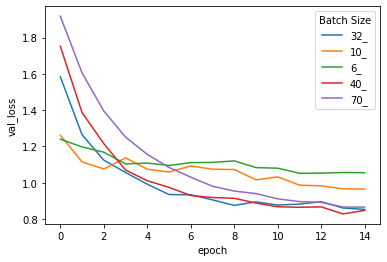

In [12]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df)

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 


*   Analysis = Learning rates seems to have a sweet spot



In [ ]:
lr_1 = create_model(lr=1).fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.8981 - accuracy: 0.2875 - val_loss: 1.7004 - val_accuracy: 0.3124
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.7886 - accuracy: 0.3130 - val_loss: 1.7309 - val_accuracy: 0.3136
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.6217 - accuracy: 0.3883 - val_loss: 1.5770 - val_accuracy: 0.4314
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.6084 - accuracy: 0.3973 - val_loss: 1.6448 - val_accuracy: 0.3948
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5636 - accuracy: 0.4224 - val_loss: 1.5668 - val_accuracy: 0.4234
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5451 - accuracy: 0.4375 - val_loss: 1.5329 - val_accuracy: 0.4259
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5280 - accuracy: 0.4431 - val_loss: 1.5258 - val_accuracy: 0.4624
Epoch 

In [ ]:
lr_onetenth = create_model(lr=.1).fit(X_train, y_train, 
                             epochs=15, 
                             batch_size=75, 
                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5222 - accuracy: 0.5312 - val_loss: 1.2542 - val_accuracy: 0.6063
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1829 - accuracy: 0.6220 - val_loss: 1.1260 - val_accuracy: 0.6372
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1297 - accuracy: 0.6366 - val_loss: 1.1211 - val_accuracy: 0.6285
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1157 - accuracy: 0.6349 - val_loss: 1.1121 - val_accuracy: 0.6314
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1409 - accuracy: 0.6104 - val_loss: 1.1140 - val_accuracy: 0.6183
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1104 - accuracy: 0.6349 - val_loss: 1.1170 - val_accuracy: 0.6368
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0707 - accuracy: 0.6479 - val_loss: 1.0560 - val_accuracy: 0.6589
Epoch 

In [ ]:
lr_oneonehundreth = create_model(lr=.01).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1326 - accuracy: 0.3626 - val_loss: 1.9740 - val_accuracy: 0.4943
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.8158 - accuracy: 0.5482 - val_loss: 1.6615 - val_accuracy: 0.5978
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5329 - accuracy: 0.6062 - val_loss: 1.4263 - val_accuracy: 0.6161
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3415 - accuracy: 0.6382 - val_loss: 1.2720 - val_accuracy: 0.6533
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2147 - accuracy: 0.6660 - val_loss: 1.1723 - val_accuracy: 0.6784
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1297 - accuracy: 0.6854 - val_loss: 1.0976 - val_accuracy: 0.6943
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0657 - accuracy: 0.6978 - val_loss: 1.0470 - val_accuracy: 0.6988
Epoch 

In [ ]:
lr_onethousandth = create_model(lr=.001).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3133 - accuracy: 0.1171 - val_loss: 2.2713 - val_accuracy: 0.1510
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2502 - accuracy: 0.2003 - val_loss: 2.2285 - val_accuracy: 0.2570
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2116 - accuracy: 0.2912 - val_loss: 2.1929 - val_accuracy: 0.3368
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1773 - accuracy: 0.3574 - val_loss: 2.1595 - val_accuracy: 0.3861
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1444 - accuracy: 0.3973 - val_loss: 2.1276 - val_accuracy: 0.4213
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1140 - accuracy: 0.4280 - val_loss: 2.0977 - val_accuracy: 0.4430
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 2.0835 - accuracy: 0.4502 - val_loss: 2.0673 - val_accuracy: 0.4577
Epoch 

In [ ]:
lr_onetenthousandth = create_model(lr=.0001).fit(X_train, y_train, 
                                             epochs=15, 
                                             batch_size=75, 
                                             validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.4954 - accuracy: 0.1002 - val_loss: 2.4721 - val_accuracy: 0.0992
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.4471 - accuracy: 0.0999 - val_loss: 2.4300 - val_accuracy: 0.0993
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.4101 - accuracy: 0.0995 - val_loss: 2.3970 - val_accuracy: 0.0980
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3812 - accuracy: 0.0998 - val_loss: 2.3707 - val_accuracy: 0.0992
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3578 - accuracy: 0.1017 - val_loss: 2.3490 - val_accuracy: 0.1019
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3382 - accuracy: 0.1048 - val_loss: 2.3307 - val_accuracy: 0.1057
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3218 - accuracy: 0.1092 - val_loss: 2.3153 - val_accuracy: 0.1114
Epoch 

In [ ]:
import seaborn as sns
import pandas as pd

learning_rates = []

for exp, result in zip([lr_1, lr_onetenth, lr_oneonehundreth, lr_onethousandth, lr_onetenthousandth], ["1.0_", "0.1", "0.01_", "0.001_", "0.0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  learning_rates.append(df)

df = pd.concat(learning_rates)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.898101,0.287471,1.700418,0.312433,0,1.0_
1,1.788587,0.312957,1.730872,0.313567,1,1.0_
2,1.621658,0.388286,1.576983,0.431433,2,1.0_
3,1.608395,0.397271,1.644824,0.394800,3,1.0_
4,1.563629,0.422414,1.566847,0.423433,4,1.0_


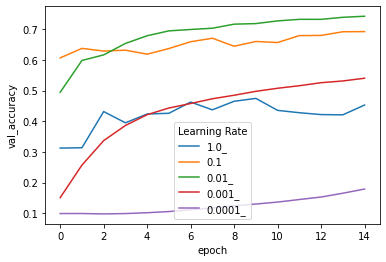

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

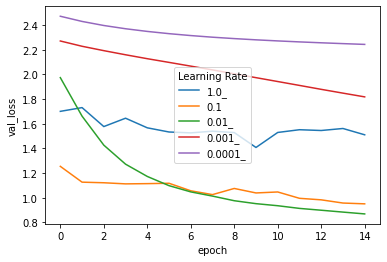

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df)

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
sgd = create_model().fit(X_train, y_train, 
                        epochs=15, 
                        batch_size=75, 
                        validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1085 - accuracy: 0.3623 - val_loss: 1.9229 - val_accuracy: 0.4734
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.7688 - accuracy: 0.5133 - val_loss: 1.6263 - val_accuracy: 0.5480
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5153 - accuracy: 0.5637 - val_loss: 1.4200 - val_accuracy: 0.5817
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3506 - accuracy: 0.5956 - val_loss: 1.2954 - val_accuracy: 0.5951
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2534 - accuracy: 0.6161 - val_loss: 1.2167 - val_accuracy: 0.6273
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1870 - accuracy: 0.6413 - val_loss: 1.1598 - val_accuracy: 0.6590
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1321 - accuracy: 0.6587 - val_loss: 1.1148 - val_accuracy: 0.6698
Epoch 

In [ ]:
adam = create_model(optimizer=Adam).fit(X_train, y_train, 
                                        epochs=15, 
                                        batch_size=75, 
                                        validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.5952 - accuracy: 0.4113 - val_loss: 1.3231 - val_accuracy: 0.5551
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2858 - accuracy: 0.5527 - val_loss: 1.2769 - val_accuracy: 0.5579
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3000 - accuracy: 0.5442 - val_loss: 1.3206 - val_accuracy: 0.5567
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2934 - accuracy: 0.5501 - val_loss: 1.2914 - val_accuracy: 0.5490
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3006 - accuracy: 0.5400 - val_loss: 1.2770 - val_accuracy: 0.5576
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 1.2909 - accuracy: 0.5569 - val_loss: 1.1935 - val_accuracy: 0.5987
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 1.1896 - accuracy: 0.5987 - val_loss: 1.1553 - val_accuracy: 0.6182
Epoch 

In [ ]:
from tensorflow.keras.optimizers import Adadelta

adadelta = create_model(optimizer=Adadelta).fit(X_train, y_train, 
                                                epochs=15, 
                                                batch_size=75, 
                                                validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 2.3842 - accuracy: 0.1105 - val_loss: 2.3277 - val_accuracy: 0.1230
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2904 - accuracy: 0.1482 - val_loss: 2.2616 - val_accuracy: 0.1868
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 2.2379 - accuracy: 0.2374 - val_loss: 2.2188 - val_accuracy: 0.2701
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1991 - accuracy: 0.2989 - val_loss: 2.1828 - val_accuracy: 0.3148
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1634 - accuracy: 0.3345 - val_loss: 2.1473 - val_accuracy: 0.3443
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 2.1277 - accuracy: 0.3629 - val_loss: 2.1114 - val_accuracy: 0.3720
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 2.0920 - accuracy: 0.3883 - val_loss: 2.0763 - val_accuracy: 0.3953
Epoch 

In [ ]:
from tensorflow.keras.optimizers import Ftrl

ftrl = create_model(optimizer=Ftrl).fit(X_train, y_train, 
                                        epochs=15, 
                                        batch_size=75, 
                                        validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 3s 3ms/step - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.0993
Epoch 2/15
934/934 [==============================] - 2s 3ms/step - loss: 2.2911 - accuracy: 0.1355 - val_loss: 2.2420 - val_accuracy: 0.1897
Epoch 3/15
934/934 [==============================] - 2s 3ms/step - loss: 2.0694 - accuracy: 0.1961 - val_loss: 1.9396 - val_accuracy: 0.2123
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 1.8929 - accuracy: 0.2339 - val_loss: 1.8615 - val_accuracy: 0.2557
Epoch 5/15
934/934 [==============================] - 2s 3ms/step - loss: 1.8282 - accuracy: 0.2760 - val_loss: 1.8030 - val_accuracy: 0.3011
Epoch 6/15
934/934 [==============================] - 2s 3ms/step - loss: 1.7742 - accuracy: 0.3141 - val_loss: 1.7546 - val_accuracy: 0.3224
Epoch 7/15
934/934 [==============================] - 2s 3ms/step - loss: 1.7315 - accuracy: 0.3335 - val_loss: 1.7166 - val_accuracy: 0.3427
Epoch 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

rmsprop = create_model(optimizer=RMSprop).fit(X_train, y_train, 
                                          epochs=15, 
                                          batch_size=75, 
                                          validation_data=(X_test, y_test))

Epoch 1/15
934/934 [==============================] - 2s 2ms/step - loss: 1.3376 - accuracy: 0.5380 - val_loss: 1.1662 - val_accuracy: 0.5936
Epoch 2/15
934/934 [==============================] - 2s 2ms/step - loss: 1.0705 - accuracy: 0.6495 - val_loss: 0.9870 - val_accuracy: 0.6914
Epoch 3/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9970 - accuracy: 0.6799 - val_loss: 1.0215 - val_accuracy: 0.6772
Epoch 4/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9779 - accuracy: 0.6873 - val_loss: 0.9215 - val_accuracy: 0.7046
Epoch 5/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9355 - accuracy: 0.6994 - val_loss: 0.9304 - val_accuracy: 0.7119
Epoch 6/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9137 - accuracy: 0.7087 - val_loss: 0.9227 - val_accuracy: 0.7045
Epoch 7/15
934/934 [==============================] - 2s 2ms/step - loss: 0.9049 - accuracy: 0.7124 - val_loss: 0.9118 - val_accuracy: 0.7095
Epoch 

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
The process of updating the weights and bias of a Neural Network in order to get a batter accuracy rating
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


